# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from xgboost import XGBRegressor
from xgboost import plot_tree
from xgboost import to_graphviz
from polylearn import PolynomialNetworkRegressor
from polylearn import FactorizationMachineRegressor


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'False'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/concrete_data.csv')

In [6]:
target_col = 'Strength'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 3

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(1030, 9)

#### Some records

In [12]:
display(df)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Dataframe structure

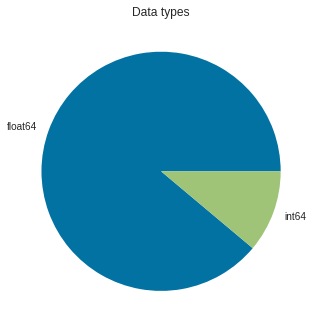

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Which columns could be categorical ?

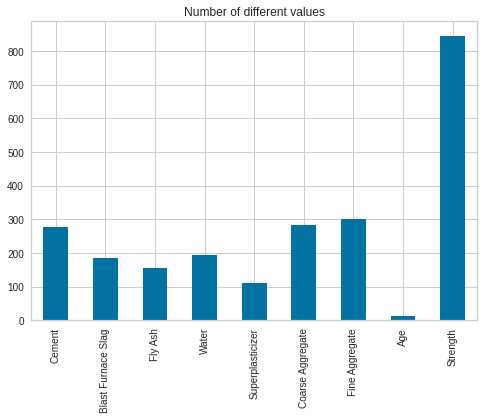

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 25
Number of rows after removing: 1005


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Cement
Encoding numeric column: Blast Furnace Slag
Encoding numeric column: Fly Ash
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Coarse Aggregate
Encoding numeric column: Fine Aggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


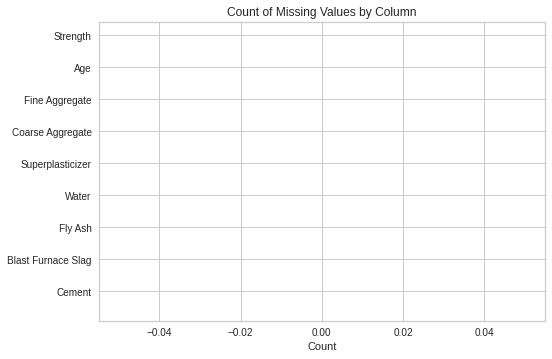

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

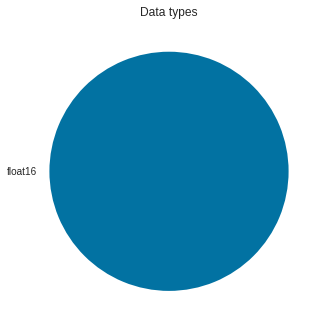

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

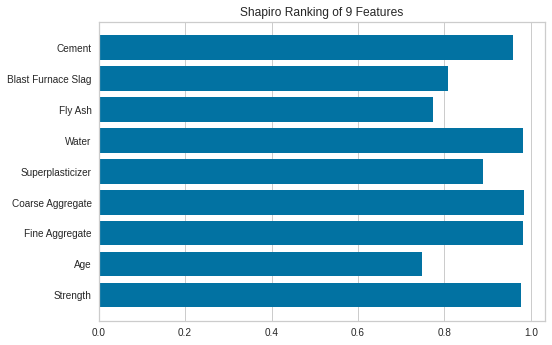

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

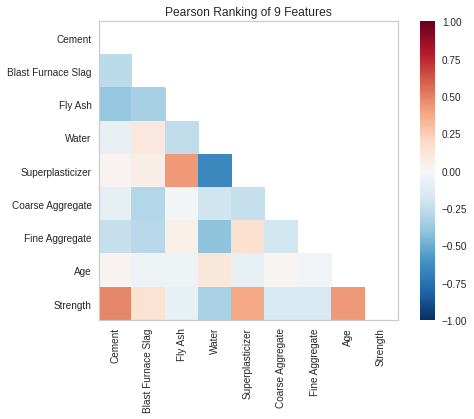

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

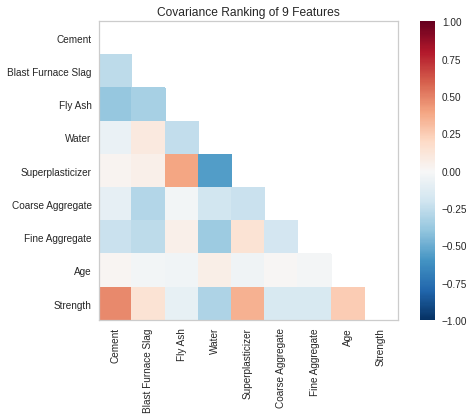

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

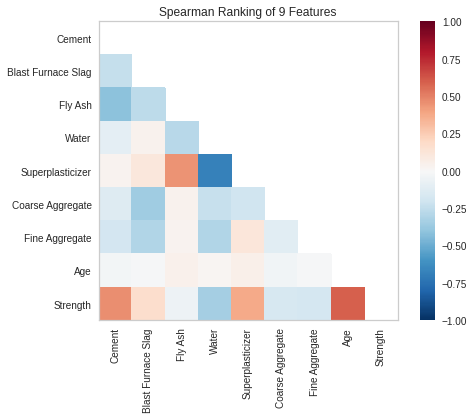

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

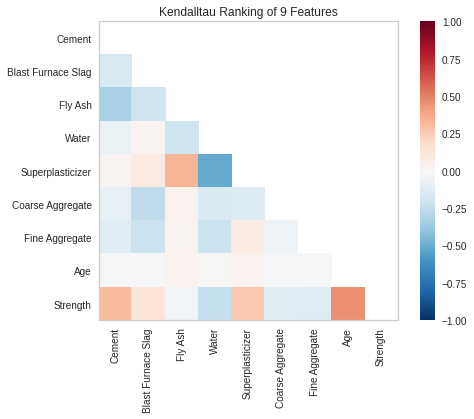

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

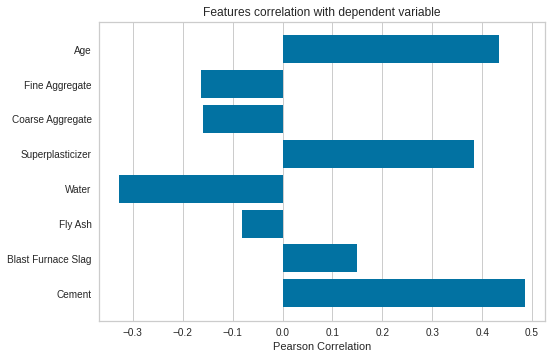

In [35]:
feature_correlation(X, y);

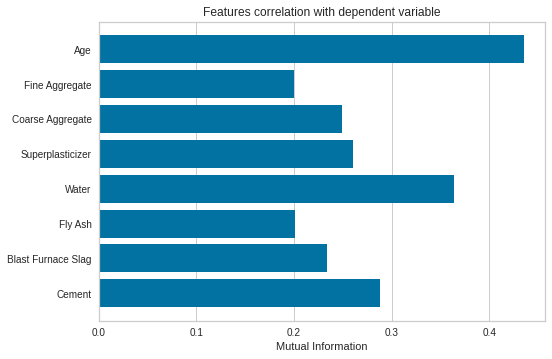

In [36]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

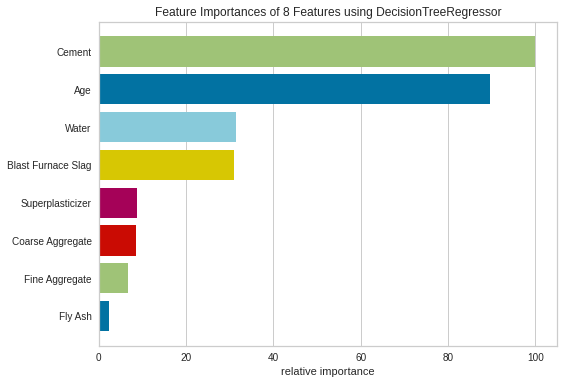

In [37]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

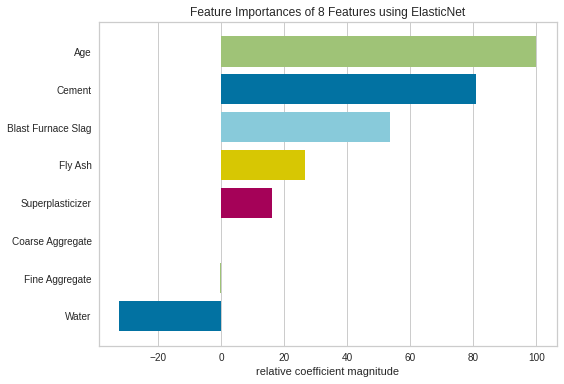

In [38]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [39]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

##### Simple model

In [40]:
model = XGBRegressor(max_depth=5, n_estimators=20, verbosity=0)

##### Possible other models based on decision trees:

In [41]:
# DecisionTreeRegressor(max_depth=5)
# RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto')
# AdaBoostRegressor()
# XGBRegressor(max_depth=5, n_estimators=20, verbosity=0)


### Model fitting

In [42]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 389 ms, sys: 18.9 ms, total: 408 ms
Wall time: 158 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

#### Tree

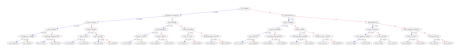

In [43]:
plot_tree(model)
plt.show()

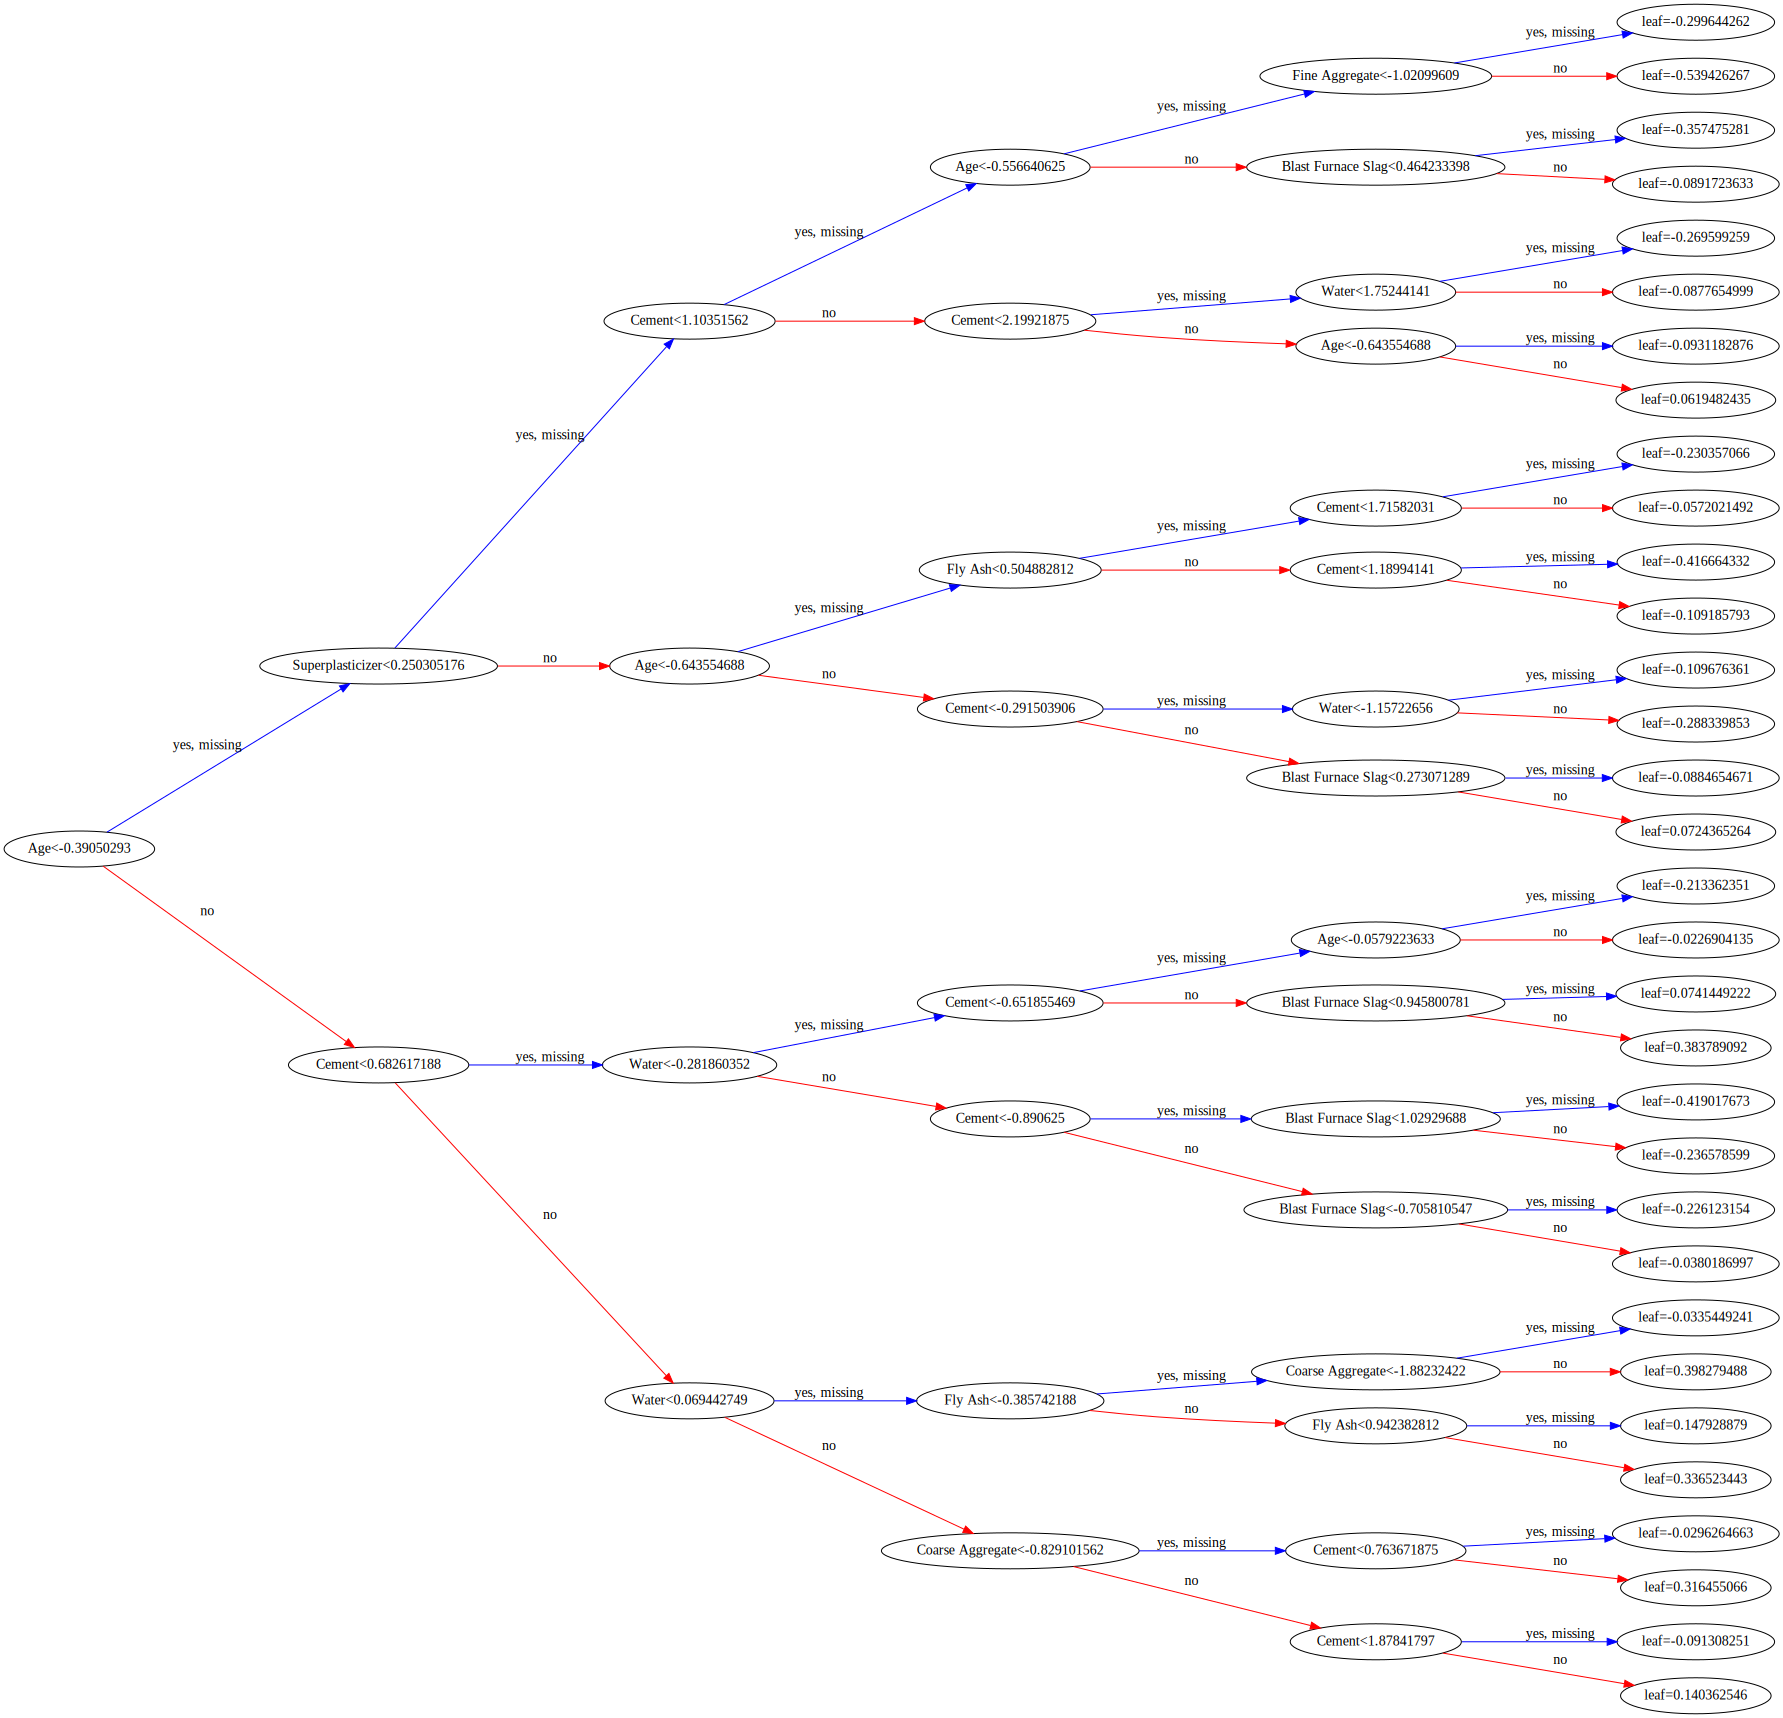

In [44]:
to_graphviz(model, num_trees=0, rankdir='LR')

### Model evaluation

#### Model scoring

In [45]:
print('Score on train set:', model.score(X_train, y_train))

Score on train set: 0.9781246984782307


In [46]:
print('Score on test set:', model.score(X_test, y_test))

Score on test set: 0.9031044663722225


#### Learning curve

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'num_parallel_tree', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 

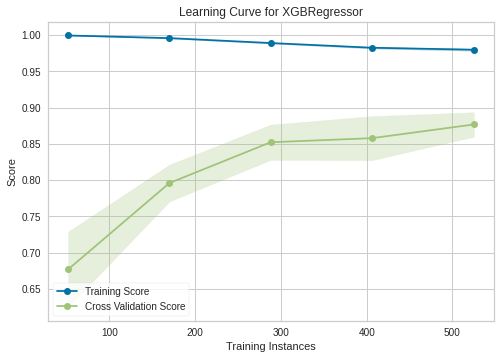

In [47]:
learning_curve(model, X_train, y_train, scoring='r2');

#### Feature permutation importance (a posteriori)

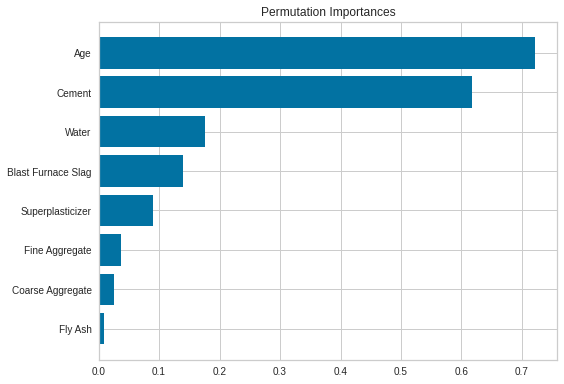

In [48]:
plot_perm_imp(model, X, y, scoring = 'r2');

#### Residuals plot

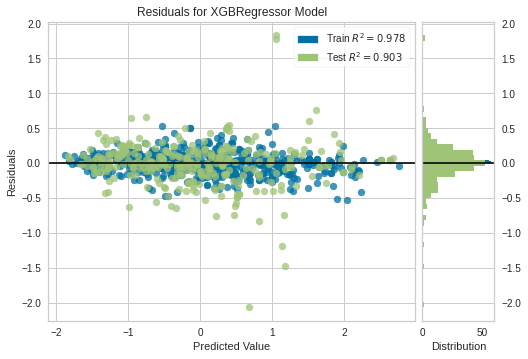

In [49]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

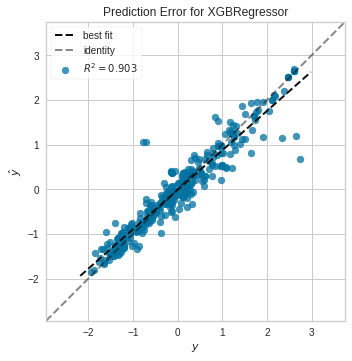

In [50]:
prediction_error(model, X_train, y_train, X_test, y_test);